In [29]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import time
import math
from matplotlib import animation
from IPython.display import HTML

# Zad1

In [30]:
def Euler(f, a,  b, n, f_a):
    ts = []
    res = []
    h = (b - a)/n
    t = a
    x = f_a
    ts.append(a)
    res.append(x)
    for k in range(n):
        x += h * f(t, x)
        t += h
        ts.append(t)
        res.append(x)
    return x, ts, res

In [31]:
def Runge(f, a, b, n, f_a):
    ts = []
    res = []
    h = (b - a)/n
    t = a
    x = f_a
    res.append(x)
    ts.append(t)
    for k in range(1, n+1):
        k1 = h * f(t,x)
        k2 = h * f(t + h / 2, x + k1 / 2)
        k3 = h * f(t + h / 2, x + k2 / 2)
        k4 = h * f(t + h, x + k3 / 2)
        x += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        t += h
        res.append(x)
        ts.append(t)
    return x, ts, res

In [32]:
def f1(t, x):
    return 2 + (x - t - 1) ** 2

In [33]:
def compare_plots(n):
    print("Ilość kroków: ", n)
    x, ts, res = Euler(f1, 1, 2, n, 2)
    ivp = solve_ivp(f1, (1,2), [2], t_eval = ts)
    x1,ts1, res1 = Runge(f1, 1, 2, n,2)
    print(f'Metoda Eulera: {res1[-1]}')
    print(f'Metoda Rungego-Kutty: {res[-1]}')
    print(f'Funkcja biblioteczna: {ivp.y.T[-1]}')
    plt.plot(ts, res, label = 'Euler')
    plt.plot(ts1, res1, label = 'Runge-Kutta')
    plt.plot(ts, ivp.y.T, label = 'Solve_ivp')
    plt.xlabel('Time')
    plt.ylabel('X')
    plt.legend()
    plt.show()

Ilość kroków:  200
Metoda Eulera: 4.5546536463381315
Metoda Rungego-Kutty: 4.547031123992295
Funkcja biblioteczna: [4.55600013]


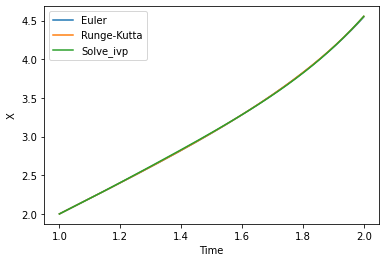

In [34]:
compare_plots(200)

Ilość kroków:  60
Metoda Eulera: 4.54833290914411
Metoda Rungego-Kutty: 4.524045174469672
Funkcja biblioteczna: [4.55600013]


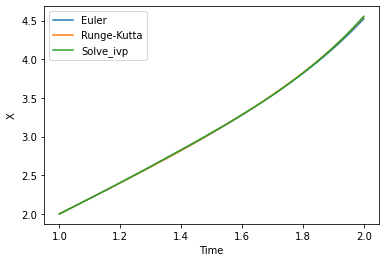

In [35]:
compare_plots(60)

Jak widać wyniki różnią się zarówno przy 200, jak i 60 krokach, jednak w obu przypadkach nieznacznie. Wykresy również pokrywają się z funkcją biblioteczną.

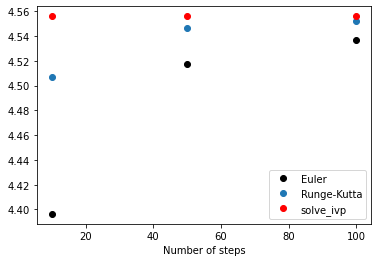

In [36]:
def compare_res():
    tab = [10, 50, 100]
    res_E = []
    res_R = []
    for i in tab:
        _, _, res = Euler(f1, 1, 2, i, 2)
        res_E.append(res[-1])
        _, _, res1 = Runge(f1, 1, 2, i, 2)
        res_R.append(res1[-1])
        
    x, ts, res = Euler(f1, 1, 2, 60, 2)
    ivp = solve_ivp(f1, (1,2), [2], t_eval = ts)
    
    plt.plot(tab, res_E, 'o', color = 'black', label = 'Euler')
    plt.plot(tab, res_R, 'o', label = 'Runge-Kutta')
    plt.plot(tab, [ivp.y.T[-1] for i in range(len(tab))], 'o', color = 'red', label = 'solve_ivp')
    plt.xlabel("Number of steps")
    plt.ylabel("")
    plt.legend()
        
compare_res()


Postanowiłam przedstawić porównanie otrzymanych wartości na końcu przedziału (w punkcie 2) na powyższym wykresie, gdzie widać, że im więcej kroków, tym obie metody dają lepsze wyniki, bardziej zbliżone do funkcji bibliotecznej. Jednak metoda Eulera jest mniej dokładna, widać szczególnie bardzo dużą różnice między wynikami przy 10 krokach.

W metodzie Eulera mając warunek początkowy przechodzimy do kolejnego punktu (oddalonego o h) aż dojdziemy do szukanej wartości, do końca przedziału. W każdym kroku obliczamy wartość w tym punkcie na podstawie wzoru x(t + h) = x(t) + h * x'(t) - ten wzór bierze się z tego, że w tej metodzie bierzmy jedynie dwa pierwsze wyrażenia z rozwinięcia Taylora. Jest to metoda prosta, dająca dobre wyniki, jednak ma swoje wady (np. nie zawsze jest stabilna). Warto zauważyć, że metoda Rungego-Kutty pierwszego rzędu to metoda Eulera.

# Zad 2

W zadaniach korzytałam z metody Rungego-Kutty czwartego rzędu. 

In [41]:
all_time = 100
g = 9.8
angle = 90
h = 0.025
l = 1

W tym zadaniu korzystałam z równań wyprowadzonych na stronie https://www.myphysicslab.com/pendulum/pendulum-en.html. Aby uzyskać formę odpowiednią dla rozwiązywania metodą Rungego-Kutty wprowadziłam nową zmienną (omega) oznaczającą prędkość kątową. Dokładna postać równań znajduje się w podrozdziale Numerical Solution.

In [42]:
def single_pendulum_rk(f, h):
    t = np.arange(0, all_time, h)
    n = len(t)
    
    theta = [] #kąt wahadła
    omega = [] #prędkość kątowa
    
    theta.append(np.radians(angle))
    omega.append(np.radians(0))
    
    for i in range(0, n-1): 
        k1_t = h * omega[i]
        k1_o = h * f(theta[i], l)

        k2_t = h * (omega[i] + 0.5 * k1_o)
        k2_o = h * f(theta[i] + 0.5 * k1_t, l)

        k3_t = h * (omega[i] + 0.5 * k2_o)
        k3_o = h * f(theta[i] + 0.5 * k2_t, l)

        k4_t = h * (omega[i] + k3_o)
        k4_o = h * f(theta[i] + k3_t, l)

        theta.append(theta[i] + (k1_t + 2 * k2_t + 2 * k3_t + k4_t) / 6.0)
        omega.append(omega[i] + (k1_o + 2 * k2_o + 2 * k3_o + k4_o) / 6.0)
        
    return theta, omega, t

def f(x, l):
    return -g/l * np.sin(x)


In [43]:
def single_pendulum(ys):
    x1 = []
    y1 = []

    #theta oznacza kąt wychylenia wahadła
    for i in range(len(ys)):
        x1.append(l * np.sin(ys[i])) #x = L * sin(theta)
        y1.append(-l * np.cos(ys[i])) # y = -L * cos(theta)  
        
    return x1, y1

In [46]:
%matplotlib tk
from matplotlib import rc, animation
from IPython.display import HTML

ys, v, t = single_pendulum_rk(f, h)
x1, y1 = single_pendulum(ys)

fig = plt.figure()
ax = plt.axes(xlim=(-3,3), ylim=(-2.5, 1.5))
pend_w, = ax.plot([], [], 'bo', markersize = 10) 
string, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
time_template = 'Time = %.1f s'
time_string = ax.text(0.05, 0.9, '', transform=ax.transAxes)

 
def init():
    pend_w.set_data([], [])
    string.set_data([], [])
    time_string.set_text('')
    return  pend_w, string, time_string

def animate(i):
    dt = t[2]-t[1]     
    pend_w.set_data(x1[i], y1[i])  
    string.set_data([x1[i], 0], [y1[i],0])              
    time_string.set_text(time_template % (i*dt))
    return pend_w, string, time_string

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(t), interval=1000*(t[2]-t[1])*0.8, blit=True)
plt.show()

# Zad 3

W poniższej komórce można ustawić wartości: trwania animacji (all_time), obu mas, długości linek, na których są zawieszone i krok czasowy (h).

In [52]:
# all_time = 6
# m1 = 1
# m2 = 1
# l1 = 1
# l2 = 1
# h = 0.025

In [53]:
all_time = 10
m1 = 3
m2 = 1
l1 = 1
l2 = 0.5
h = 0.025

Funkcje f_omega1 i f_omega2 zawierają wzory zamieszczone wraz z wyprowadzeniem na stronie: https://www.myphysicslab.com/pendulum/double-pendulum-en.html

In [54]:
 def f_omega1(theta1, theta2, w1, w2):
    cos = np.cos(theta1 - theta2)
    sin_1 = np.sin(theta1)
    sin  = np.sin(theta1 - theta2)
    sin_2 = np.sin(theta1 - 2 * theta2)
    cos_2 = np.cos(2 * theta1 - 2 * theta2)
        
    n = -g * (2 * m1 + m2) *  np.sin(theta1) - m2 * g * sin_2 - 2 * sin * m2 * (w2 ** 2 * l2 + w1 **2 * l1 * cos)
    d = l1 * (2 * m1 + m2 - m2 * cos_2)

    return n/d
    
def f_omega2(theta1, theta2, w1, w2):
    cos = np.cos(theta1 - theta2)
    cos_1 = np.cos(theta1)
    sin  = np.sin(theta1 - theta2)
    cos_2 = np.cos(2 * theta1 - 2 * theta2)       
        
    n = 2 * sin * w1 ** 2 * l1 * (m1 + m2) + g * (m1 + m2) * cos_1 + w2 ** 2 * l2 * m2 * cos
    d = l2 * (2 * m1 + m2 - m2 * cos_2)
        
    return n/d

In [55]:
def double_pendulum():

    t = np.arange(0, all_time, h)
    n = len(t)
    
    omega1 = []
    theta1 = []
    omega2 = []
    theta2 = []

    omega1.append(np.radians(0))
    omega2.append(np.radians(0))
    theta1.append(np.radians(90))
    theta2.append(np.radians(45))
    
    for i in range(0, n-1):
        k1_t1 = h * omega1[i]
        k1_t2 = h * omega2[i]
        k1_o1 = h * f_omega1(theta1[i], theta2[i], omega1[i], omega2[i])
        k1_o2 = h * f_omega2(theta1[i], theta2[i], omega1[i], omega2[i])
    
        k2_t1 = h * (omega1[i] + 0.5 * k1_o1)
        k2_t2 = h * (omega2[i] + 0.5 * k1_o2)
        k2_o1 = h * f_omega1(theta1[i] + 0.5 * k1_t1, theta2[i] + 0.5 * k1_t2, omega1[i] + 0.5 * k1_o1, omega2[i] + 0.5 * k1_o2)
        k2_o2 = h * f_omega2(theta1[i] + 0.5 * k1_t1, theta2[i] + 0.5 * k1_t2, omega1[i] + 0.5 * k1_o1, omega2[i] + 0.5 * k1_o2)    

        k3_t1 = h * (omega1[i] + 0.5 * k2_o1)
        k3_t2 = h * (omega2[i] + 0.5 * k2_o2)
        k3_o1 = h * f_omega1(theta1[i] + 0.5 * k2_t1, theta2[i] + 0.5 * k2_t2, omega1[i] + 0.5 * k2_o1, omega2[i] + 0.5 * k2_o2)
        k3_o2 = h * f_omega2(theta1[i] + 0.5 * k2_t1, theta2[i] + 0.5 * k2_t2, omega1[i] + 0.5 * k2_o1, omega2[i] + 0.5 * k2_o2)     
        k4_t1 = h * (omega1[i] + k3_o1)
        k4_t2 = h * (omega2[i] + k3_o2)
        k4_o1 = h * f_omega1(theta1[i] +  k3_t1, theta2[i] + k3_t2, omega1[i] + k3_o1, omega2[i] + k3_o2)
        k4_o2 = h * f_omega2(theta1[i] +  k3_t1, theta2[i] + k3_t2, omega1[i] + k3_o1, omega2[i] + k3_o2)
        
        omega1.append(omega1[i] + (k1_o1 + 2 * k2_o1 + k3_o1 + k4_o1) / 6)
        omega2.append(omega2[i] + (k1_o2 + 2 * k2_o2 + k3_o2 + k4_o2) / 6)
        theta1.append(theta1[i] + (k1_t1 + 2 * k2_t1 + k3_t1 + k4_t1) / 6)
        theta2.append(theta2[i] + (k1_t2 + 2 * k2_t2 + k3_t2 + k4_t2) / 6)
        
    return omega1, omega2, theta1, theta2, t       

In [56]:
from matplotlib import rc, animation
from IPython.display import HTML

o1, o2, t1, t2, t = double_pendulum()

x1 = []
y1 = []
x2 = []
y2 = []

#theta oznacza kąt wychylenia wahadła
for i in range(len(t1)):
    x1.append(l1 * np.sin(t1[i])) #x = L * sin(theta)
    y1.append(-l1 * np.cos(t1[i])) # y = -L * cos(theta)
    x2.append(x1[i] + l2 * np.sin(t2[i]))
    y2.append(y1[i] - l2 * np.cos(t2[i]))

fig = plt.figure()
ax = plt.axes(xlim=(-3,3), ylim=(-2.5, 1.5))
pend_m1, = ax.plot([], [], 'bo', markersize = 10) 
pend_m2, = ax.plot([], [], 'bo', markersize = 10) 
string_1, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
string_2, =  ax.plot([], [], color='k', linestyle='-', linewidth=2)
time_template = 'Time = %.1f s'
time_string = ax.text(0.05, 0.9, '', transform=ax.transAxes)

 
def init():
    pend_m1.set_data([], [])
    pend_m2.set_data([], [])  
    string_1.set_data([], [])
    string_2.set_data([],[])
    time_string.set_text('')
    return  pend_m1, pend_m2, string_1, string_2, time_string

def animate(i):
    pend_m1.set_data(x1[i], y1[i])  
    pend_m2.set_data(x2[i], y2[i])  
    string_1.set_data([x1[i], 0], [y1[i],0])  
    string_2.set_data([x1[i], x2[i]], [y1[i], y2[i]])              
    time_string.set_text(time_template % (i*h))
    return pend_m1, pend_m2, string_1, string_2, time_string

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(t), interval=1000*(t[2]-t[1])*0.8, blit=True)
plt.show()

Próbowałam różnych wartości mas i długości linek - te zmiany faktycznie zmieniały zachowanie wahadła.

Przy tworzeniu animacji korzystałam z: https://github.com/zaman13/Double-Pendulum-Motion-Animation (jednak tutaj wykorzystywane są funkcje biblioteczne do rozwiązania równań, ja korzystałam jedynie z metod dotyczących animacji).